In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from fuzzywuzzy import process

In [121]:
summary_items_detailed_df = pd.read_csv("summary_items_detailed.csv", low_memory=False)
reservations_df = pd.read_csv("Reservations.csv", encoding='unicode_escape')
date_dimension_df = pd.read_csv("dim_date.csv")

C:\Users\chack\AppData\Local\Temp\ipykernel_8264\1768984571.py:3: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  date_dimension_df = pd.read_csv("dim_date.csv")


In [122]:
print("Size of summary_items_detailed_df is: ", summary_items_detailed_df.size)
print("Shape of summary_items_detailed_df is: ", summary_items_detailed_df.shape)
summary_items_detailed_df.set_index('Date')
# summary_items_detailed_df.head()

Size of summary_items_detailed_df is:  7400811
Shape of summary_items_detailed_df is:  (224267, 33)


,Time,Time_Zone,Category,Item,Qty,Price_Point_Name,SKU,Modifiers_Applied,Gross_Sales,Discounts,...,Customer_Reference_ID,Unit,Count,Itemisation_Type,Commission,Employee,Fulfilment_Note,Token,Itemization_Type,Fulfillment_Note
Date,,,,,,,,,,,,,,,,,,,,,
01-09-2024,0:29:47,America/Toronto,Liquor,Johny's Martini,1,Regular,NaN,"Gin, Dirty",$17.00,$0.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,VNT7DLBX4VY2AAEKYABYJJF6,Physical Good,NaN
01-09-2024,0:29:47,America/Toronto,Liquor,DBL Dark Rum,1,Regular,NaN,NaN,$20.00,$0.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,AWD5URQUKM3JEI5HOEAUAUBI,Physical Good,NaN
01-09-2024,0:29:47,America/Toronto,Liquor,Aperol Spritz,1,Regular,NaN,NaN,$19.00,$0.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,FFRI22FGNXK3Z2WXA6TMIYSB,Physical Good,NaN
01-09-2024,0:29:47,America/Toronto,Starters,Mozzarella Sticks,1,Regular,NaN,NaN,$16.00,$0.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,6L3IWZLI5NHRR363CJNIZ3PG,Physical Good,NaN
01-09-2024,0:29:47,America/Toronto,Liquor,Johny's Martini,1,Regular,NaN,"Gin, Dirty",$17.00,$0.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,VNT7DLBX4VY2AAEKYABYJJF6,Physical Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13-08-2022,19:13:29,America/Toronto,Beer,Draft - Left-Field,1,Regular,NaN,NaN,$8.00,$0.00,...,",",ea,1,Physical Good,$0.00,Daniel Suss,NaN,HD54K4MKL2WIVVECZQNBZP4U,NaN,NaN
13-08-2022,19:13:29,America/Toronto,NaN,COZ! (Voided),1,Regular,NaN,NaN,$0.00,$0.00,...,",",ea,1,Physical Good,$0.00,Daniel Suss,NaN,ZUHIAJCDQ56PYGQTQH6QUWKN,NaN,NaN
13-08-2022,19:06:40,America/Toronto,Food,Burger,1,Regular,NaN,Medium Rare,$20.00,($10.00),...,NaN,ea,1,Physical Good,$0.00,Daniel Suss,NaN,HJ4XW4EPMZHB6DM5F5OK4IKC,NaN,NaN


In [123]:
print("Size of reservations_df is: ", reservations_df.size)
print("Shape of reservations_df is: ", reservations_df.shape)

reservations_df.head()

Size of reservations_df is:  173376
Shape of reservations_df is:  (21672, 8)


,ReservationID,Time,Name,Email,Phone,Party Size,Table,Date
0,20221001,17:00:00,Stephanie Onoferychuk,sXXXXXXXXXXk@gmail.com,+1XXXXXXXXXXX15,2,13,26-08-2022
1,20221002,17:30:00,Maya Elfhal,mXXXXXl@gmail.com,+1XXXXXXXXXXX39,2,21,26-08-2022
2,20221003,17:30:00,Tyler,jXXXXXXXc@gmail.com,+1XXXXXXXXXXX30,4,15,26-08-2022
3,20221004,18:00:00,Jaclyn Carbone,jXXXXXXXc@gmail.com,+1XXXXXXXXXXX30,2,20,26-08-2022
4,20221005,18:00:00,Anna Hopkins,aXXXXXXs@gmail.com,+1XXXXXXXXXXX96,6,10,26-08-2022


In [124]:
print("Size of date_dimension_df is: ", date_dimension_df.size)
print("Shape of date_dimension_df is: ", date_dimension_df.shape)

date_dimension_df.head()

Size of date_dimension_df is:  1121335
Shape of date_dimension_df is:  (224267, 5)


,Date,Day,Month,Year,Season
0,01-09-2024,1.0,9.0,2024.0,Fall
1,31-08-2024,31.0,8.0,2024.0,Summer
2,30-08-2024,30.0,8.0,2024.0,Summer
3,29-08-2024,29.0,8.0,2024.0,Summer
4,28-08-2024,28.0,8.0,2024.0,Summer


In [125]:
summary_items_detailed_df.describe(include='all')

,Date,Time,Time_Zone,Category,Item,Qty,Price_Point_Name,SKU,Modifiers_Applied,Gross_Sales,...,Customer_Reference_ID,Unit,Count,Itemisation_Type,Commission,Employee,Fulfilment_Note,Token,Itemization_Type,Fulfillment_Note
count,224267,224267,224267,220845,224267,224267.000000,223542,0.0,14882,224267,...,58840,224267,224267.000000,109905,224267,202647,0.0,223542,113637,0.0
unique,694,21728,1,22,878,NaN,1,NaN,338,285,...,16,1,NaN,1,1,30,NaN,424,1,NaN
top,15-06-2024,17:04:44,America/Toronto,'Tavern Pie' - Red,Pepperoni,NaN,Regular,NaN,Garlic Sauce,$16.00,...,",",ea,NaN,Physical Good,$0.00,Cherie D'Elia,NaN,IACU2YNBAVR3RWPDFRLRME2N,Physical Good,NaN
freq,1058,208,224267,37720,17769,NaN,223542,NaN,2867,24727,...,30429,224267,NaN,109905,224267,33349,NaN,17939,113637,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.125275,NaN,NaN,NaN,NaN,...,NaN,NaN,1.125275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.596294,NaN,NaN,NaN,NaN,...,NaN,NaN,0.596294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-45.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,-45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
summary_items_detailed_df.columns

Index(['Date', 'Time', 'Time_Zone', 'Category', 'Item', 'Qty',
       'Price_Point_Name', 'SKU', 'Modifiers_Applied', 'Gross_Sales',
       'Discounts', 'Net_Sales', 'Tax', 'Transaction_ID', 'Payment_ID',
       'Device_Name', 'Notes', 'Details', 'Event_Type', 'Location',
       'Dining_Option', 'Customer_ID', 'Customer_Name',
       'Customer_Reference_ID', 'Unit', 'Count', 'Itemisation_Type',
       'Commission', 'Employee', 'Fulfilment_Note', 'Token',
       'Itemization_Type', 'Fulfillment_Note'],
      dtype='object')

In [127]:
summary_items_detailed_df

,Date,Time,Time_Zone,Category,Item,Qty,Price_Point_Name,SKU,Modifiers_Applied,Gross_Sales,...,Customer_Reference_ID,Unit,Count,Itemisation_Type,Commission,Employee,Fulfilment_Note,Token,Itemization_Type,Fulfillment_Note
0,01-09-2024,0:29:47,America/Toronto,Liquor,Johny's Martini,1,Regular,NaN,"Gin, Dirty",$17.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,VNT7DLBX4VY2AAEKYABYJJF6,Physical Good,NaN
1,01-09-2024,0:29:47,America/Toronto,Liquor,DBL Dark Rum,1,Regular,NaN,NaN,$20.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,AWD5URQUKM3JEI5HOEAUAUBI,Physical Good,NaN
2,01-09-2024,0:29:47,America/Toronto,Liquor,Aperol Spritz,1,Regular,NaN,NaN,$19.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,FFRI22FGNXK3Z2WXA6TMIYSB,Physical Good,NaN
3,01-09-2024,0:29:47,America/Toronto,Starters,Mozzarella Sticks,1,Regular,NaN,NaN,$16.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,6L3IWZLI5NHRR363CJNIZ3PG,Physical Good,NaN
4,01-09-2024,0:29:47,America/Toronto,Liquor,Johny's Martini,1,Regular,NaN,"Gin, Dirty",$17.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,VNT7DLBX4VY2AAEKYABYJJF6,Physical Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224262,13-08-2022,19:13:29,America/Toronto,Beer,Draft - Left-Field,1,Regular,NaN,NaN,$8.00,...,",",ea,1,Physical Good,$0.00,Daniel Suss,NaN,HD54K4MKL2WIVVECZQNBZP4U,NaN,NaN
224263,13-08-2022,19:13:29,America/Toronto,NaN,COZ! (Voided),1,Regular,NaN,NaN,$0.00,...,",",ea,1,Physical Good,$0.00,Daniel Suss,NaN,ZUHIAJCDQ56PYGQTQH6QUWKN,NaN,NaN
224264,13-08-2022,19:06:40,America/Toronto,Food,Burger,1,Regular,NaN,Medium Rare,$20.00,...,NaN,ea,1,Physical Good,$0.00,Daniel Suss,NaN,HJ4XW4EPMZHB6DM5F5OK4IKC,NaN,NaN
224265,13-08-2022,19:06:40,America/Toronto,Beer,Draft - Moretti,1,Regular,NaN,NaN,$9.00,...,NaN,ea,1,Physical Good,$0.00,Daniel Suss,NaN,3INOLYQQTRUY2VI63JMJXPKH,NaN,NaN


In [128]:
summary_items_detailed_df.query("Qty < -1")

,Date,Time,Time_Zone,Category,Item,Qty,Price_Point_Name,SKU,Modifiers_Applied,Gross_Sales,...,Customer_Reference_ID,Unit,Count,Itemisation_Type,Commission,Employee,Fulfilment_Note,Token,Itemization_Type,Fulfillment_Note
40714,25-05-2024,19:33:39,America/Toronto,Beverage,Ruby ORANGE,-2,Regular,NaN,NaN,($16.00),...,NaN,ea,-2,NaN,$0.00,NaN,NaN,JCPV6CD6MCLW2YYTTY35UVZX,Physical Good,NaN
42865,19-05-2024,19:05:05,America/Toronto,Beverage,Ruby FUJI,-2,Regular,NaN,NaN,($16.00),...,NaN,ea,-2,NaN,$0.00,NaN,NaN,AXBZQ4FZZJL6IB2XRQLY2C3Z,Physical Good,NaN
90377,20-12-2023,22:28:23,America/Toronto,Liquor,SHOT Rail Vodka,-2,Regular,NaN,NaN,($16.00),...,NaN,ea,-2,NaN,$0.00,NaN,NaN,IXVB3SMCXPJZZ5XOHDCRHUOT,Physical Good,NaN
94251,07-12-2023,19:14:23,America/Toronto,Beverage,Grapefruit Sour,-2,Regular,NaN,NaN,($20.00),...,NaN,ea,-2,NaN,$0.00,NaN,NaN,CKDFIJIBQMONAKZKAUSL3DHT,Physical Good,NaN
128608,24-08-2023,20:10:19,America/Toronto,Beer,Draft - Jelly King,-2,Regular,NaN,NaN,($20.00),...,NaN,ea,-2,Physical Good,$0.00,NaN,NaN,TIB4OMD5RW5X67KR6PKITP7M,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194647,29-01-2023,0:54:47,America/Toronto,Liquor,Bar Rail Vodka,-3,Regular,NaN,NaN,($27.00),...,NaN,ea,-3,Physical Good,$0.00,NaN,NaN,H2NSWDNAMU5C2L3FLFU3BSJ4,NaN,NaN
203471,04-12-2022,19:11:32,America/Toronto,Sparkling,Fiumano Prosecco,-2,Regular,NaN,NaN,($112.00),...,NaN,ea,-2,Physical Good,$0.00,NaN,NaN,NQVI7YVHKOVWU5V4VC4YZY52,NaN,NaN
215091,05-10-2022,22:02:50,America/Toronto,Liquor,Bar Rail Gin,-2,Regular,NaN,NaN,($16.00),...,NaN,ea,-2,Physical Good,$0.00,NaN,NaN,4TB7ZWUM7EUT3K2XC3COL6SU,NaN,NaN
215093,05-10-2022,22:02:50,America/Toronto,Starters,Mozzarella Sticks,-2,Regular,NaN,NaN,($30.00),...,NaN,ea,-2,Physical Good,$0.00,NaN,NaN,6L3IWZLI5NHRR363CJNIZ3PG,NaN,NaN


In [129]:
print(summary_items_detailed_df['Time'].dtype)

object


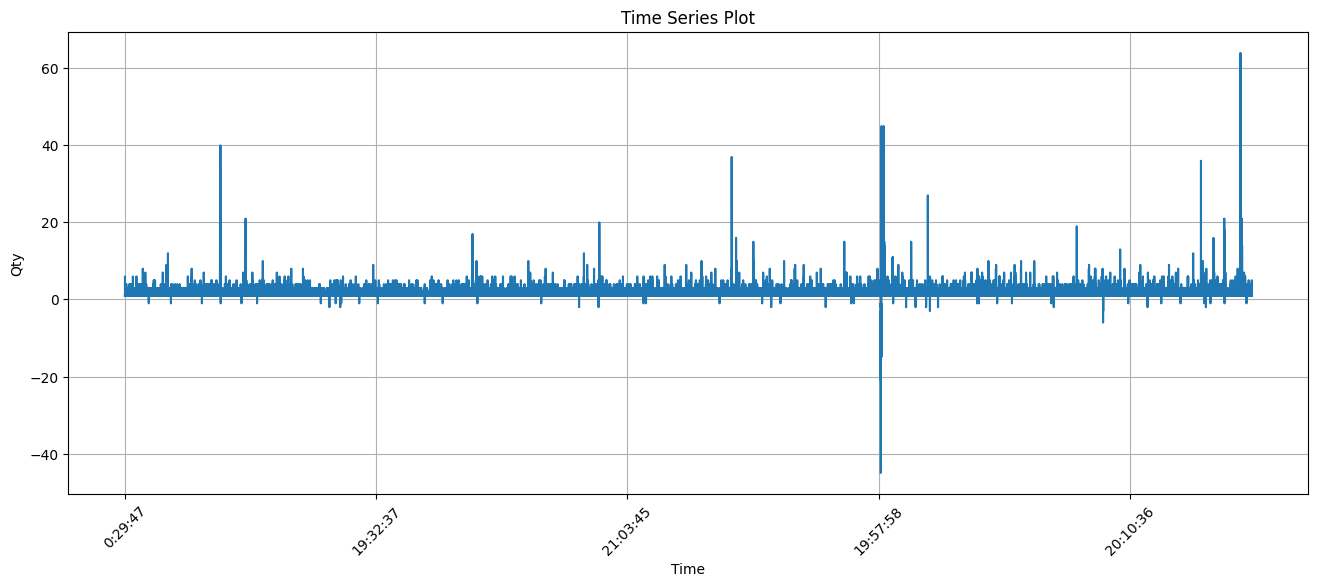

In [130]:
summary_items_detailed_df.set_index('Time')['Qty'].plot(figsize=(16,6), title="Time Series Plot", grid=True)
plt.xlabel('Time')
plt.ylabel('Qty')
plt.xticks(rotation=45)
plt.show()

In [131]:
summary_items_detailed_df['Time'] = pd.to_datetime(summary_items_detailed_df['Time'], format='%H:%M:%S').dt.time

# Define the start and end times for filtering (5 PM to 12 AM)
start_time = pd.to_datetime('17:00:00', format='%H:%M:%S').time()
end_time = pd.to_datetime('23:59:59', format='%H:%M:%S').time()

# Filtering rows where start time is 5 pm and end time is 12 am, which is the time when restaurant is open
summary_items_filtered_df = summary_items_detailed_df[(summary_items_detailed_df['Time'] >= start_time) & (summary_items_detailed_df['Time'] <= end_time)]

print(summary_items_filtered_df)

              Date      Time        Time_Zone              Category  \
18      31-08-2024  23:58:12  America/Toronto                  Beer   
19      31-08-2024  23:58:12  America/Toronto                Liquor   
20      31-08-2024  23:58:12  America/Toronto                Salads   
21      31-08-2024  23:58:12  America/Toronto    'Tavern Pie' - Red   
22      31-08-2024  23:58:12  America/Toronto  Food (uncategorized)   
...            ...       ...              ...                   ...   
224262  13-08-2022  19:13:29  America/Toronto                  Beer   
224263  13-08-2022  19:13:29  America/Toronto                   NaN   
224264  13-08-2022  19:06:40  America/Toronto                  Food   
224265  13-08-2022  19:06:40  America/Toronto                  Beer   
224266  13-08-2022  18:57:06  America/Toronto                  Beer   

                       Item  Qty Price_Point_Name  SKU Modifiers_Applied  \
18          Draft - Moretti    1          Regular  NaN               Na

In [132]:
rows, col = summary_items_detailed_df.shape
n_rows, _ = summary_items_filtered_df.shape

print(f'{rows - n_rows} rows have been deleted as a result...')

11877 rows have been deleted as a result...


In [133]:
summary_items_filtered_df.loc[:, "Date"] = pd.to_datetime(summary_items_filtered_df["Date"], format='%d-%m-%Y')

In [134]:
summary_items_filtered_df.columns


Index(['Date', 'Time', 'Time_Zone', 'Category', 'Item', 'Qty',
       'Price_Point_Name', 'SKU', 'Modifiers_Applied', 'Gross_Sales',
       'Discounts', 'Net_Sales', 'Tax', 'Transaction_ID', 'Payment_ID',
       'Device_Name', 'Notes', 'Details', 'Event_Type', 'Location',
       'Dining_Option', 'Customer_ID', 'Customer_Name',
       'Customer_Reference_ID', 'Unit', 'Count', 'Itemisation_Type',
       'Commission', 'Employee', 'Fulfilment_Note', 'Token',
       'Itemization_Type', 'Fulfillment_Note'],
      dtype='object')

In [135]:
print(summary_items_filtered_df["Net_Sales"].dtypes)

object


In [136]:
df=summary_items_filtered_df[summary_items_filtered_df['Item'].str.contains('(Voided)')]
df.Qty.sum()
df

C:\Users\chack\AppData\Local\Temp\ipykernel_8264\1365944407.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df=summary_items_filtered_df[summary_items_filtered_df['Item'].str.contains('(Voided)')]


,Date,Time,Time_Zone,Category,Item,Qty,Price_Point_Name,SKU,Modifiers_Applied,Gross_Sales,...,Customer_Reference_ID,Unit,Count,Itemisation_Type,Commission,Employee,Fulfilment_Note,Token,Itemization_Type,Fulfillment_Note
93,2024-08-31 00:00:00,22:59:24,America/Toronto,Liquor,Margarita (Voided),1,Regular,NaN,NaN,$0.00,...,", ,",ea,1,NaN,$0.00,Gordon Harrison,NaN,NA2A5RWTJRWNQOK6LW2TWOOR,Physical Good,NaN
109,2024-08-31 00:00:00,22:37:40,America/Toronto,Liquor,Aperol Spritz (Voided),1,Regular,NaN,Hugo Spritz,$0.00,...,", ,",ea,1,NaN,$0.00,Sheril Joseph,NaN,FFRI22FGNXK3Z2WXA6TMIYSB,Physical Good,NaN
110,2024-08-31 00:00:00,22:37:40,America/Toronto,Liquor,Spicy Margarita (Voided),1,Regular,NaN,NaN,$0.00,...,", ,",ea,1,NaN,$0.00,Sheril Joseph,NaN,BKHSQA7HDT4X6PFONN3DX35G,Physical Good,NaN
111,2024-08-31 00:00:00,22:37:40,America/Toronto,Liquor,Aperol Spritz (Voided),1,Regular,NaN,NaN,$0.00,...,", ,",ea,1,NaN,$0.00,Sheril Joseph,NaN,FFRI22FGNXK3Z2WXA6TMIYSB,Physical Good,NaN
112,2024-08-31 00:00:00,22:37:40,America/Toronto,Starters,Tomato Carpaccio special (Voided),1,Regular,NaN,NaN,$0.00,...,", ,",ea,1,NaN,$0.00,Sheril Joseph,NaN,7DI7IEH5R7Z7BE2ZYO5ECQWF,Physical Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224172,2022-08-13 00:00:00,21:11:01,America/Toronto,Beer,Draft - Left-Field (Voided),1,Regular,NaN,NaN,$0.00,...,",",ea,1,Physical Good,$0.00,Daniel Suss,NaN,HD54K4MKL2WIVVECZQNBZP4U,NaN,NaN
224173,2022-08-13 00:00:00,21:11:01,America/Toronto,NaN,Sprite (Voided),1,Regular,NaN,NaN,$0.00,...,",",ea,1,Physical Good,$0.00,Daniel Suss,NaN,QRGX7Q2LYHM3IO75TBKVVWZO,NaN,NaN
224174,2022-08-13 00:00:00,21:11:01,America/Toronto,NaN,Juice (Voided),1,Regular,NaN,NaN,$0.00,...,",",ea,1,Physical Good,$0.00,Daniel Suss,NaN,MWNRS3IGDTVH4QSLAFHSGXG7,NaN,NaN
224210,2022-08-13 00:00:00,20:48:24,America/Toronto,NaN,Bar Rail Gin (Voided),1,Regular,NaN,NaN,$0.00,...,NaN,ea,1,Physical Good,$0.00,Daniel Suss,NaN,4TB7ZWUM7EUT3K2XC3COL6SU,NaN,NaN


#### Converting the format of Net_Sales column from string to float

In [137]:

summary_items_filtered_df.loc[:, 'Net_Sales'] = summary_items_filtered_df['Net_Sales'].str.replace('$', '', regex=False)  # Remove dollar sign
summary_items_filtered_df.loc[:, 'Net_Sales'] = summary_items_filtered_df['Net_Sales'].str.replace(r'\((.*)\)', r'-\1', regex=True)  # Handle negative values
summary_items_filtered_df.loc[:, 'Net_Sales'] = summary_items_filtered_df['Net_Sales'].str.replace(',', '', regex=False)  # Remove commas
summary_items_filtered_df.loc[:, 'Net_Sales'] = summary_items_filtered_df['Net_Sales'].astype(float)  # Convert to float

In [138]:

summary_items_filtered_df.loc[:, 'Gross_Sales'] = summary_items_filtered_df['Gross_Sales'].str.replace('$', '', regex=False)  # Remove dollar sign
summary_items_filtered_df.loc[:, 'Gross_Sales'] = summary_items_filtered_df['Gross_Sales'].str.replace(r'\((.*)\)', r'-\1', regex=True)  # Handle negative values
summary_items_filtered_df.loc[:, 'Gross_Sales'] = summary_items_filtered_df['Gross_Sales'].str.replace(',', '', regex=False)  # Remove commas
summary_items_filtered_df.loc[:, 'Gross_Sales'] = summary_items_filtered_df['Gross_Sales'].astype(float)  # Convert to float

In [139]:
summary_items_filtered_df.loc[(summary_items_filtered_df['Gross_Sales'] == 0) | (summary_items_filtered_df['Category'] == 'CUSTOM AMOUNT'), 'Qty'] = 0

In [140]:
summary_items_group_by_df = summary_items_filtered_df.groupby('Date').agg({'Qty' : 'sum', 'Net_Sales':'sum'}).reset_index()

In [141]:
summary_items_group_by_df.tail()

,Date,Qty,Net_Sales
683,2024-08-27,323,4800.87
684,2024-08-28,409,6632.0
685,2024-08-29,440,6866.69
686,2024-08-30,605,9626.61
687,2024-08-31,637,10149.5


In [142]:
date_dimension_df["Date"] = pd.to_datetime(date_dimension_df["Date"], format='%d-%m-%Y')

In [143]:
print(summary_items_group_by_df.shape)
print(date_dimension_df.shape)

(688, 3)
(224267, 5)


In [144]:
secondary_merged_df = pd.merge(summary_items_group_by_df, date_dimension_df, on="Date")

In [145]:
secondary_merged_df

,Date,Qty,Net_Sales,Day,Month,Year,Season
0,2022-08-13,140,1795.0,13.0,8.0,2022.0,Summer
1,2022-08-14,72,894.0,14.0,8.0,2022.0,Summer
2,2022-08-16,0,0.0,16.0,8.0,2022.0,Summer
3,2022-08-17,72,1116.5,17.0,8.0,2022.0,Summer
4,2022-08-18,84,1209.5,18.0,8.0,2022.0,Summer
...,...,...,...,...,...,...,...
683,2024-08-27,323,4800.87,27.0,8.0,2024.0,Summer
684,2024-08-28,409,6632.0,28.0,8.0,2024.0,Summer
685,2024-08-29,440,6866.69,29.0,8.0,2024.0,Summer
686,2024-08-30,605,9626.61,30.0,8.0,2024.0,Summer


#### Processing reservations.csv

In [146]:
reservations_df.dtypes

ReservationID     int64
Time             object
Name             object
Email            object
Phone            object
Party Size       object
Table            object
Date             object
dtype: object

In [147]:
reservations_df["Date"] = pd.to_datetime(reservations_df["Date"], format='%d-%m-%Y')
reservations_df

,ReservationID,Time,Name,Email,Phone,Party Size,Table,Date
0,20221001,17:00:00,Stephanie Onoferychuk,sXXXXXXXXXXk@gmail.com,+1XXXXXXXXXXX15,2,13,2022-08-26
1,20221002,17:30:00,Maya Elfhal,mXXXXXl@gmail.com,+1XXXXXXXXXXX39,2,21,2022-08-26
2,20221003,17:30:00,Tyler,jXXXXXXXc@gmail.com,+1XXXXXXXXXXX30,4,15,2022-08-26
3,20221004,18:00:00,Jaclyn Carbone,jXXXXXXXc@gmail.com,+1XXXXXXXXXXX30,2,20,2022-08-26
4,20221005,18:00:00,Anna Hopkins,aXXXXXXs@gmail.com,+1XXXXXXXXXXX96,6,10,2022-08-26
...,...,...,...,...,...,...,...,...
21667,202422668,21:30:00,Ellise Crouter,eXXXXXXXXXXXXr@live.ca,+1XXXXXXXXXXX24,3,15,2024-08-30
21668,202422669,21:30:00,paul lee,pXXXXXXXX9@hotmail.ca,+1XXXXXXXXXXX57,3,14,2024-08-30
21669,202422670,22:09:00,(walk-in),cXXXXXXXXX0@yahoo.com,+1XXXXXXXXXXX30,2,11,2024-08-30
21670,202422671,22:30:00,Charisse Queddeng,cXXXXXXXXX0@yahoo.com,+1XXXXXXXXXXX30,2,26,2024-08-30


In [148]:
reservations_df.rename(columns={'Party Size':'Party_Size'},inplace=True)

In [149]:
reservations_df["Party_Size"] = reservations_df['Party_Size'].astype('int')

In [150]:
reservations_df.head()

,ReservationID,Time,Name,Email,Phone,Party_Size,Table,Date
0,20221001,17:00:00,Stephanie Onoferychuk,sXXXXXXXXXXk@gmail.com,+1XXXXXXXXXXX15,2,13,2022-08-26
1,20221002,17:30:00,Maya Elfhal,mXXXXXl@gmail.com,+1XXXXXXXXXXX39,2,21,2022-08-26
2,20221003,17:30:00,Tyler,jXXXXXXXc@gmail.com,+1XXXXXXXXXXX30,4,15,2022-08-26
3,20221004,18:00:00,Jaclyn Carbone,jXXXXXXXc@gmail.com,+1XXXXXXXXXXX30,2,20,2022-08-26
4,20221005,18:00:00,Anna Hopkins,aXXXXXXs@gmail.com,+1XXXXXXXXXXX96,6,10,2022-08-26


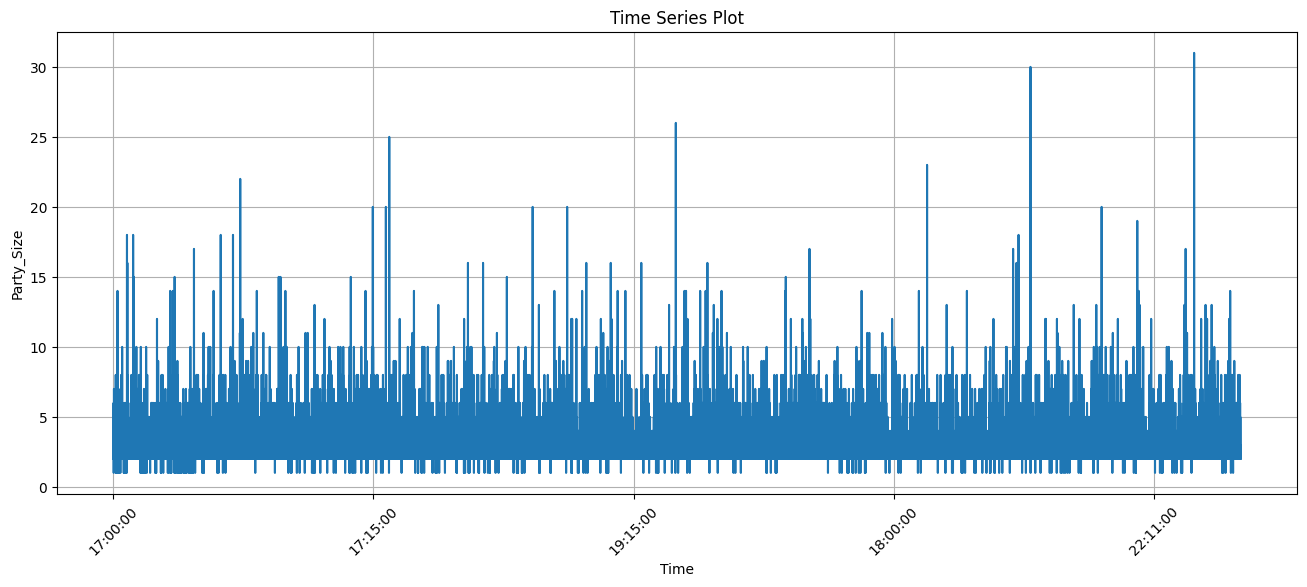

In [151]:
reservations_df.set_index('Time')['Party_Size'].plot(figsize=(16,6), title="Time Series Plot", grid=True)
plt.xlabel('Time')
plt.ylabel('Party_Size')
plt.xticks(rotation=45)
plt.show()

#### Filtering rows where start time is 5 pm and end time is 12 am, which is the time when restaurant is open

In [152]:
reservations_df['Time'] = pd.to_datetime(reservations_df['Time'], format='%H:%M:%S').dt.time

# Define the start and end times for filtering (5 PM to 12 AM)
start_time = pd.to_datetime('17:00:00', format='%H:%M:%S').time()
end_time = pd.to_datetime('23:59:59', format='%H:%M:%S').time()

# Applying filter
reservations_filtered_df = reservations_df[(reservations_df['Time'] >= start_time) & (reservations_df['Time'] <= end_time)]

reservations_df

,ReservationID,Time,Name,Email,Phone,Party_Size,Table,Date
0,20221001,17:00:00,Stephanie Onoferychuk,sXXXXXXXXXXk@gmail.com,+1XXXXXXXXXXX15,2,13,2022-08-26
1,20221002,17:30:00,Maya Elfhal,mXXXXXl@gmail.com,+1XXXXXXXXXXX39,2,21,2022-08-26
2,20221003,17:30:00,Tyler,jXXXXXXXc@gmail.com,+1XXXXXXXXXXX30,4,15,2022-08-26
3,20221004,18:00:00,Jaclyn Carbone,jXXXXXXXc@gmail.com,+1XXXXXXXXXXX30,2,20,2022-08-26
4,20221005,18:00:00,Anna Hopkins,aXXXXXXs@gmail.com,+1XXXXXXXXXXX96,6,10,2022-08-26
...,...,...,...,...,...,...,...,...
21667,202422668,21:30:00,Ellise Crouter,eXXXXXXXXXXXXr@live.ca,+1XXXXXXXXXXX24,3,15,2024-08-30
21668,202422669,21:30:00,paul lee,pXXXXXXXX9@hotmail.ca,+1XXXXXXXXXXX57,3,14,2024-08-30
21669,202422670,22:09:00,(walk-in),cXXXXXXXXX0@yahoo.com,+1XXXXXXXXXXX30,2,11,2024-08-30
21670,202422671,22:30:00,Charisse Queddeng,cXXXXXXXXX0@yahoo.com,+1XXXXXXXXXXX30,2,26,2024-08-30


In [153]:
rows, _ = reservations_df.shape
n_rows, _ = reservations_filtered_df.shape

print(f'{rows - n_rows} rows have been deleted as a result of appliying filter...')

110 rows have been deleted as a result of appliying filter...


In [154]:
reservations_groupby_df = reservations_filtered_df.groupby('Date')['Party_Size'].sum().reset_index()

<h1>Processing weather data</h1>


In [155]:
weather_df=pd.read_csv('daily_data.csv')
weather_df.drop(columns=["Unnamed: 0"],inplace=True)
weather_df

,date,weather_code,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,daylight_duration,precipitation_sum,rain_sum,showers_sum,snowfall_sum
0,2022-08-01 00:00:00+00:00,51.0,28.465500,17.315500,29.037098,17.957731,0,0,52466.043,0.400000,0.400000,0.0,0.0
1,2022-08-02 00:00:00+00:00,45.0,25.765501,18.665500,26.518820,17.784103,0,0,52327.000,0.000000,0.000000,0.0,0.0
2,2022-08-03 00:00:00+00:00,3.0,28.915500,15.565499,30.684990,14.904840,0,0,52186.207,0.000000,0.000000,0.0,0.0
3,2022-08-04 00:00:00+00:00,81.0,27.765501,21.165500,31.033356,23.134777,0,0,52043.797,10.200001,10.200001,0.0,0.0
4,2022-08-05 00:00:00+00:00,3.0,29.365501,19.415500,33.264040,20.460024,0,0,51899.918,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2024-08-27 00:00:00+00:00,2.0,31.915500,20.465500,34.216490,22.747824,0,0,48327.130,0.000000,0.000000,0.0,0.0
758,2024-08-28 00:00:00+00:00,53.0,27.315500,18.065500,30.336360,19.071920,0,0,48155.490,1.200000,1.200000,0.0,0.0
759,2024-08-29 00:00:00+00:00,3.0,21.415500,15.515500,21.343401,14.604471,0,0,47983.105,0.000000,0.000000,0.0,0.0
760,2024-08-30 00:00:00+00:00,3.0,26.065500,14.915500,29.019253,14.923918,0,0,47810.082,0.000000,0.000000,0.0,0.0


<h2>Checking column type of weather

In [156]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      762 non-null    object 
 1   weather_code              762 non-null    float64
 2   temperature_2m_max        762 non-null    float64
 3   temperature_2m_min        762 non-null    float64
 4   apparent_temperature_max  762 non-null    float64
 5   apparent_temperature_min  762 non-null    float64
 6   sunrise                   762 non-null    int64  
 7   sunset                    762 non-null    int64  
 8   daylight_duration         762 non-null    float64
 9   precipitation_sum         762 non-null    float64
 10  rain_sum                  762 non-null    float64
 11  showers_sum               762 non-null    float64
 12  snowfall_sum              762 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 77.5+ KB


<h3>Extracting date from datetime and converting it to date

In [157]:
date_pattern=r"(\d{4}-\d{2}-\d{2})"
weather_df['Date']=weather_df['date'].str.extract(date_pattern)
weather_df.drop(columns=['date'],inplace=True)
weather_df

,weather_code,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,daylight_duration,precipitation_sum,rain_sum,showers_sum,snowfall_sum,Date
0,51.0,28.465500,17.315500,29.037098,17.957731,0,0,52466.043,0.400000,0.400000,0.0,0.0,2022-08-01
1,45.0,25.765501,18.665500,26.518820,17.784103,0,0,52327.000,0.000000,0.000000,0.0,0.0,2022-08-02
2,3.0,28.915500,15.565499,30.684990,14.904840,0,0,52186.207,0.000000,0.000000,0.0,0.0,2022-08-03
3,81.0,27.765501,21.165500,31.033356,23.134777,0,0,52043.797,10.200001,10.200001,0.0,0.0,2022-08-04
4,3.0,29.365501,19.415500,33.264040,20.460024,0,0,51899.918,0.000000,0.000000,0.0,0.0,2022-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2.0,31.915500,20.465500,34.216490,22.747824,0,0,48327.130,0.000000,0.000000,0.0,0.0,2024-08-27
758,53.0,27.315500,18.065500,30.336360,19.071920,0,0,48155.490,1.200000,1.200000,0.0,0.0,2024-08-28
759,3.0,21.415500,15.515500,21.343401,14.604471,0,0,47983.105,0.000000,0.000000,0.0,0.0,2024-08-29
760,3.0,26.065500,14.915500,29.019253,14.923918,0,0,47810.082,0.000000,0.000000,0.0,0.0,2024-08-30


In [158]:
weather_df["Date"] = pd.to_datetime(weather_df["Date"], format='%Y-%m-%d')
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   weather_code              762 non-null    float64       
 1   temperature_2m_max        762 non-null    float64       
 2   temperature_2m_min        762 non-null    float64       
 3   apparent_temperature_max  762 non-null    float64       
 4   apparent_temperature_min  762 non-null    float64       
 5   sunrise                   762 non-null    int64         
 6   sunset                    762 non-null    int64         
 7   daylight_duration         762 non-null    float64       
 8   precipitation_sum         762 non-null    float64       
 9   rain_sum                  762 non-null    float64       
 10  showers_sum               762 non-null    float64       
 11  snowfall_sum              762 non-null    float64       
 12  Date                  

<h3> Checking for null values in Weather_df

In [159]:
weather_df.isnull().sum()

weather_code                0
temperature_2m_max          0
temperature_2m_min          0
apparent_temperature_max    0
apparent_temperature_min    0
sunrise                     0
sunset                      0
daylight_duration           0
precipitation_sum           0
rain_sum                    0
showers_sum                 0
snowfall_sum                0
Date                        0
dtype: int64

<h3>Checking for inconsistencies in row values of columns in Weather_df

In [160]:
weather_desc=weather_df.describe()
weather_desc.loc['sum']=weather_df.select_dtypes(include='number').sum()
weather_desc

,weather_code,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunrise,sunset,daylight_duration,precipitation_sum,rain_sum,showers_sum,snowfall_sum,Date
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.0,762.0,7.620000e+02,762.000000,762.000000,762.0,762.000000,762
mean,25.170604,14.574030,6.782232,13.164274,4.126708,0.0,0.0,4.424379e+04,2.101312,2.096757,0.0,0.003189,2023-08-16 12:00:00
min,0.000000,-10.284500,-21.884499,-17.855770,-27.549883,0.0,0.0,3.211012e+04,0.000000,0.000000,0.0,0.000000,2022-08-01 00:00:00
25%,3.000000,5.428000,-0.422000,1.362514,-4.680507,0.0,0.0,3.648737e+04,0.000000,0.000000,0.0,0.000000,2023-02-07 06:00:00
50%,3.000000,14.990500,6.390500,13.050729,3.316179,0.0,0.0,4.477736e+04,0.000000,0.000000,0.0,0.000000,2023-08-16 12:00:00
75%,52.500000,24.165500,14.653000,25.340710,13.650586,0.0,0.0,5.171047e+04,0.700000,0.700000,0.0,0.000000,2024-02-22 18:00:00
max,95.000000,32.465500,23.365501,38.447884,26.429276,0.0,0.0,5.561582e+04,88.600000,88.600000,0.0,1.292900,2024-08-31 00:00:00
std,27.203999,10.321867,8.918058,12.917038,11.097579,0.0,0.0,7.998010e+03,6.614282,6.613506,0.0,0.053527,NaN
sum,19180.000000,11105.411106,5168.061002,10031.176736,3144.551266,0.0,0.0,3.371377e+07,1601.200005,1597.729005,0.0,2.429700,NaN


In [161]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   weather_code              762 non-null    float64       
 1   temperature_2m_max        762 non-null    float64       
 2   temperature_2m_min        762 non-null    float64       
 3   apparent_temperature_max  762 non-null    float64       
 4   apparent_temperature_min  762 non-null    float64       
 5   sunrise                   762 non-null    int64         
 6   sunset                    762 non-null    int64         
 7   daylight_duration         762 non-null    float64       
 8   precipitation_sum         762 non-null    float64       
 9   rain_sum                  762 non-null    float64       
 10  showers_sum               762 non-null    float64       
 11  snowfall_sum              762 non-null    float64       
 12  Date                  

In [162]:
weather_df['month']=weather_df['Date'].dt.month
weather_df['year']=weather_df['Date'].dt.year
august_2022_df = weather_df[(weather_df["Date"].dt.month == 8) & (weather_df["Date"].dt.year == 2022)]
august_2022_df['rain_sum'].sum()

85.2000031

<h3> Percipitaion month and year wise to get better understanding of the numbers

In [163]:
rainfall_by_year_month = weather_df.groupby(["year"])["precipitation_sum"].sum().reset_index()
rainfall_by_year_month

,year,precipitation_sum
0,2022,307.300007
1,2023,794.499992
2,2024,499.400007


<h3> Final weather Dataframe before merge

In [164]:
weather_df_filtered=weather_df.drop(columns=['weather_code','temperature_2m_max','temperature_2m_min','sunrise','sunset','daylight_duration','rain_sum','showers_sum','snowfall_sum','month','year'])
weather_df_filtered['Average_temp']=(weather_df_filtered['apparent_temperature_max']+weather_df_filtered['apparent_temperature_min'])/2
weather_df_filtered.drop(columns=['apparent_temperature_max','apparent_temperature_min'],inplace=True)
weather_df_filtered

,precipitation_sum,Date,Average_temp
0,0.400000,2022-08-01,23.497414
1,0.000000,2022-08-02,22.151462
2,0.000000,2022-08-03,22.794915
3,10.200001,2022-08-04,27.084066
4,0.000000,2022-08-05,26.862032
...,...,...,...
757,0.000000,2024-08-27,28.482157
758,1.200000,2024-08-28,24.704140
759,0.000000,2024-08-29,17.973936
760,0.000000,2024-08-30,21.971585


In [165]:
reservations_groupby_df

,Date,Party_Size
0,2022-08-26,35
1,2022-08-27,31
2,2022-08-28,28
3,2022-08-31,16
4,2022-09-01,41
...,...,...
663,2024-08-26,69
664,2024-08-27,74
665,2024-08-28,98
666,2024-08-29,68


In [166]:
secondary_merged_df

,Date,Qty,Net_Sales,Day,Month,Year,Season
0,2022-08-13,140,1795.0,13.0,8.0,2022.0,Summer
1,2022-08-14,72,894.0,14.0,8.0,2022.0,Summer
2,2022-08-16,0,0.0,16.0,8.0,2022.0,Summer
3,2022-08-17,72,1116.5,17.0,8.0,2022.0,Summer
4,2022-08-18,84,1209.5,18.0,8.0,2022.0,Summer
...,...,...,...,...,...,...,...
683,2024-08-27,323,4800.87,27.0,8.0,2024.0,Summer
684,2024-08-28,409,6632.0,28.0,8.0,2024.0,Summer
685,2024-08-29,440,6866.69,29.0,8.0,2024.0,Summer
686,2024-08-30,605,9626.61,30.0,8.0,2024.0,Summer


In [167]:
secondary_merged_df=pd.merge(secondary_merged_df, reservations_groupby_df, on='Date')
secondary_merged_df

,Date,Qty,Net_Sales,Day,Month,Year,Season,Party_Size
0,2022-08-26,320,4183.75,26.0,8.0,2022.0,Summer,35
1,2022-08-27,240,3486.0,27.0,8.0,2022.0,Summer,31
2,2022-08-28,148,2248.0,28.0,8.0,2022.0,Summer,28
3,2022-08-31,191,2222.5,31.0,8.0,2022.0,Summer,16
4,2022-09-01,312,3948.5,1.0,9.0,2022.0,Fall,41
...,...,...,...,...,...,...,...,...
657,2024-08-26,349,5942.5,26.0,8.0,2024.0,Summer,69
658,2024-08-27,323,4800.87,27.0,8.0,2024.0,Summer,74
659,2024-08-28,409,6632.0,28.0,8.0,2024.0,Summer,98
660,2024-08-29,440,6866.69,29.0,8.0,2024.0,Summer,68


In [168]:
sales_summary_report_df=pd.merge(secondary_merged_df,weather_df_filtered,on='Date')
sales_summary_report_df

,Date,Qty,Net_Sales,Day,Month,Year,Season,Party_Size,precipitation_sum,Average_temp
0,2022-08-26,320,4183.75,26.0,8.0,2022.0,Summer,35,0.0,23.337821
1,2022-08-27,240,3486.0,27.0,8.0,2022.0,Summer,31,0.0,17.131609
2,2022-08-28,148,2248.0,28.0,8.0,2022.0,Summer,28,0.0,22.621429
3,2022-08-31,191,2222.5,31.0,8.0,2022.0,Summer,16,0.0,18.801443
4,2022-09-01,312,3948.5,1.0,9.0,2022.0,Fall,41,0.0,16.556531
...,...,...,...,...,...,...,...,...,...,...
657,2024-08-26,349,5942.5,26.0,8.0,2024.0,Summer,69,0.0,24.499437
658,2024-08-27,323,4800.87,27.0,8.0,2024.0,Summer,74,0.0,28.482157
659,2024-08-28,409,6632.0,28.0,8.0,2024.0,Summer,98,1.2,24.704140
660,2024-08-29,440,6866.69,29.0,8.0,2024.0,Summer,68,0.0,17.973936


In [169]:
sales_summary_report_df = sales_summary_report_df.rename(columns={'Party_Size': 'No_of_Customers', 'Net_Sales':'Value'})
sales_summary_report_df

,Date,Qty,Value,Day,Month,Year,Season,No_of_Customers,precipitation_sum,Average_temp
0,2022-08-26,320,4183.75,26.0,8.0,2022.0,Summer,35,0.0,23.337821
1,2022-08-27,240,3486.0,27.0,8.0,2022.0,Summer,31,0.0,17.131609
2,2022-08-28,148,2248.0,28.0,8.0,2022.0,Summer,28,0.0,22.621429
3,2022-08-31,191,2222.5,31.0,8.0,2022.0,Summer,16,0.0,18.801443
4,2022-09-01,312,3948.5,1.0,9.0,2022.0,Fall,41,0.0,16.556531
...,...,...,...,...,...,...,...,...,...,...
657,2024-08-26,349,5942.5,26.0,8.0,2024.0,Summer,69,0.0,24.499437
658,2024-08-27,323,4800.87,27.0,8.0,2024.0,Summer,74,0.0,28.482157
659,2024-08-28,409,6632.0,28.0,8.0,2024.0,Summer,98,1.2,24.704140
660,2024-08-29,440,6866.69,29.0,8.0,2024.0,Summer,68,0.0,17.973936


In [170]:
sales_summary_report_df['No_of_Customers'].skew(axis=0)

0.8205712906809838

In [171]:
sales_summary_report_df['Value'].skew(axis=0)

0.7187837035926388

In [172]:
sales_summary_report_df['Qty'].skew(axis=0)

0.7477300244560715

In [173]:
sales_summary_report_df.describe()


,Date,Qty,Day,Month,Year,No_of_Customers,precipitation_sum,Average_temp
count,662,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,2023-09-19 02:56:11.601208320,347.564955,15.925982,6.466767,2023.220544,94.528701,2.148792,8.757498
min,2022-08-26 00:00:00,1.000000,1.000000,1.000000,2022.000000,4.000000,0.000000,-19.368768
25%,2023-04-06 06:00:00,259.000000,9.000000,4.000000,2023.000000,70.000000,0.000000,-1.086402
50%,2023-09-22 12:00:00,323.000000,16.000000,6.000000,2023.000000,87.000000,0.000000,8.459480
75%,2024-03-16 18:00:00,424.000000,23.000000,9.000000,2024.000000,116.000000,0.775000,18.901856
max,2024-08-30 00:00:00,887.000000,31.000000,12.000000,2024.000000,223.000000,88.600000,31.562380
std,NaN,124.567188,8.748752,3.290928,0.666693,36.195698,6.659026,11.581940


In [174]:
sales_summary_report_df.to_csv("Transformed_Data/sales_summary_report.csv")

## Manpower Sales csv

In [175]:
employee_master_df = pd.read_csv("dim_employee_master.csv")
attendance_df = pd.read_csv("summary_attendance.csv")

In [176]:
employee_master_df.head()

,EmployeeName,Area
0,Aadhil .,BACK
1,Abdu Salih,BACK
2,Adam Mikina,FRONT
3,Alexandra leishman,FRONT
4,Anna Hopkins,FRONT


In [177]:
attendance_df.head()

,Name,Paid Hours,date
0,Aadhil .,6.62,13-07-2023
1,Aadhil .,8.63,14-07-2023
2,Aadhil .,6.72,17-07-2023
3,Aadhil .,7.00,20-07-2023
4,Aadhil .,8.87,21-07-2023


In [178]:
employee_master_df = employee_master_df.rename(columns={'EmployeeName': 'Name'})
attendance_df = attendance_df.rename(columns={'date':'Date'})

In [179]:
print(attendance_df.shape)
print(employee_master_df.shape)

(7273, 3)
(49, 2)


In [180]:
attendance_summary_df = pd.merge(attendance_df, employee_master_df, on="Name")

In [181]:
attendance_summary_df["Date"] = pd.to_datetime(attendance_summary_df["Date"], format='%d-%m-%Y')

In [182]:
attendence_set = set(attendance_df.Name.unique())

In [183]:
employee_name = set(employee_master_df.Name.unique())

In [184]:
attendence_set - employee_name

{'Ankit Sarawagi', 'Fran Bell', 'Total'}

In [185]:
attendance_summary_df.Name.unique()

array(['Aadhil .', 'Abdu Salih', 'Adam Mikina', 'Alexandra leishman',
       'Anna Hopkins', 'Anthony .', 'Arman Jamalpour', 'Athul Sukumaran',
       'Austin Hutchings', 'Brianna Beckles', 'Caleb Morin',
       'Chantele Francis', "Cherie D'Elia", 'Daniel Suss', 'Danny Barna',
       'Desean Nurse', 'Donovan Feuring', 'Farshad Fahmani',
       'gealeih barrera', 'Gokul Manoharan Sudha', 'Gordon Harrison',
       'Govind Aggarwal', 'Jadise Campbell', 'Jampa Dhondup',
       'Jasmine Mikina', 'Jordan Nunes', 'Kendra Herrin',
       'Kilian Fontaine', 'Kiran Chacko Jacob', 'Leo Robert',
       'Mark Kupfert', 'Matthew Westgate', 'Matthieu Arteau',
       'Melanie Budgell', "N'Dayah Bain", 'Rachael Brioux',
       'Reuben Thomas Varghese', 'Reza Seraj', 'Rishika Bhansaly',
       'Sajan Sunar', 'Sara Di Dio', 'Shayne Marchand', 'Sheril Joseph',
       'Shyju Sunny Jacob', 'Sudarshan Paudel', 'Vince Farelli',
       'Vishnu K.', 'Zenna Aviden'], dtype=object)

In [186]:
attendance_summary_df

,Name,Paid Hours,Date,Area
0,Aadhil .,6.62,2023-07-13,BACK
1,Aadhil .,8.63,2023-07-14,BACK
2,Aadhil .,6.72,2023-07-17,BACK
3,Aadhil .,7.00,2023-07-20,BACK
4,Aadhil .,8.87,2023-07-21,BACK
...,...,...,...,...
6510,Zenna Aviden,6.78,2024-08-22,FRONT
6511,Zenna Aviden,9.08,2024-08-23,FRONT
6512,Zenna Aviden,7.40,2024-08-25,FRONT
6513,Zenna Aviden,6.83,2024-08-29,FRONT


In [187]:
attendance_summary_with_dummies = pd.get_dummies(attendance_summary_df, columns=["Area"])

In [188]:
attendance_summary_with_dummies

,Name,Paid Hours,Date,Area_BACK,Area_FRONT
0,Aadhil .,6.62,2023-07-13,True,False
1,Aadhil .,8.63,2023-07-14,True,False
2,Aadhil .,6.72,2023-07-17,True,False
3,Aadhil .,7.00,2023-07-20,True,False
4,Aadhil .,8.87,2023-07-21,True,False
...,...,...,...,...,...
6510,Zenna Aviden,6.78,2024-08-22,False,True
6511,Zenna Aviden,9.08,2024-08-23,False,True
6512,Zenna Aviden,7.40,2024-08-25,False,True
6513,Zenna Aviden,6.83,2024-08-29,False,True


In [189]:
attendance_groupby_df = attendance_summary_with_dummies.groupby('Date').agg({'Area_BACK': 'sum', 'Area_FRONT':'sum'}).reset_index()

In [190]:
attendance_groupby_df

,Date,Area_BACK,Area_FRONT
0,2022-08-13,0,4
1,2022-08-14,0,3
2,2022-08-17,0,4
3,2022-08-18,0,4
4,2022-08-19,0,5
...,...,...,...
701,2024-08-27,5,6
702,2024-08-28,5,5
703,2024-08-29,5,8
704,2024-08-30,7,10


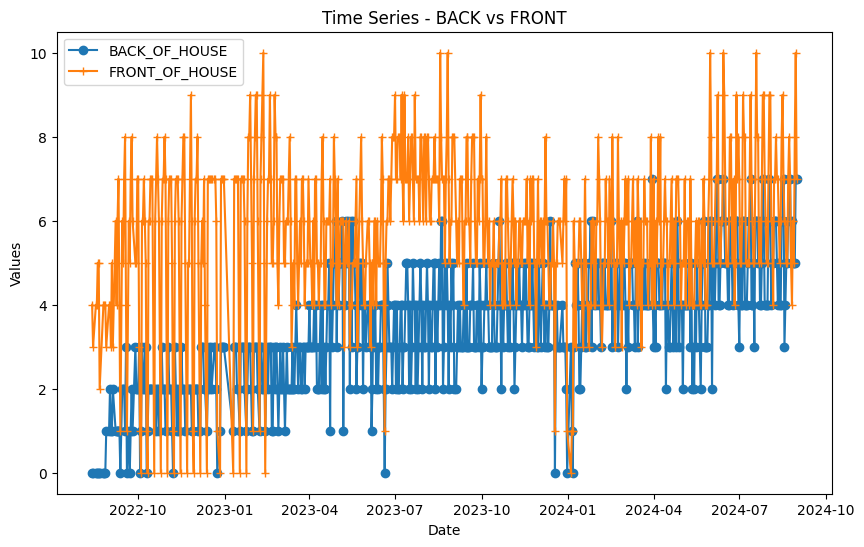

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(attendance_groupby_df['Date'],  attendance_groupby_df['Area_BACK'], label='BACK_OF_HOUSE', marker='o')
plt.plot(attendance_groupby_df['Date'],  attendance_groupby_df['Area_FRONT'], label='FRONT_OF_HOUSE', marker='+')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series - BACK vs FRONT')
plt.legend()


In [192]:
manpower_sales_df = pd.merge(sales_summary_report_df, attendance_groupby_df, on="Date")

In [193]:
manpower_sales_df = manpower_sales_df.rename(columns={'Area_BACK': 'Back_numbers', 'Area_FRONT':'Front_numbers'})
manpower_sales_df = manpower_sales_df.drop(columns=['Qty'])

In [194]:
manpower_sales_df

,Date,Value,Day,Month,Year,Season,No_of_Customers,precipitation_sum,Average_temp,Back_numbers,Front_numbers
0,2022-08-26,4183.75,26.0,8.0,2022.0,Summer,35,0.0,23.337821,0,4
1,2022-08-27,3486.0,27.0,8.0,2022.0,Summer,31,0.0,17.131609,0,4
2,2022-08-28,2248.0,28.0,8.0,2022.0,Summer,28,0.0,22.621429,1,3
3,2022-08-31,2222.5,31.0,8.0,2022.0,Summer,16,0.0,18.801443,1,4
4,2022-09-01,3948.5,1.0,9.0,2022.0,Fall,41,0.0,16.556531,2,4
...,...,...,...,...,...,...,...,...,...,...,...
655,2024-08-26,5942.5,26.0,8.0,2024.0,Summer,69,0.0,24.499437,6,4
656,2024-08-27,4800.87,27.0,8.0,2024.0,Summer,74,0.0,28.482157,5,6
657,2024-08-28,6632.0,28.0,8.0,2024.0,Summer,98,1.2,24.704140,5,5
658,2024-08-29,6866.69,29.0,8.0,2024.0,Summer,68,0.0,17.973936,5,8


         Date    Value   Day  Month    Year  Season  No_of_Customers  \
0  2022-08-26  4183.75  26.0    8.0  2022.0  Summer               35   
10 2022-09-09   7002.0   9.0    9.0  2022.0    Fall               62   
20 2022-09-23   5772.0  23.0    9.0  2022.0    Fall               60   
30 2022-10-07   4994.0   7.0   10.0  2022.0    Fall               78   
40 2022-10-21   4439.5  21.0   10.0  2022.0    Fall               67   

    precipitation_sum  Average_temp  Back_numbers  Front_numbers  
0                 0.0     23.337821             0              4  
10                0.0     21.183826             1              6  
20                0.0      7.469423             1              7  
30                0.0      9.964209             2              7  
40                0.0      4.751061             2              8  


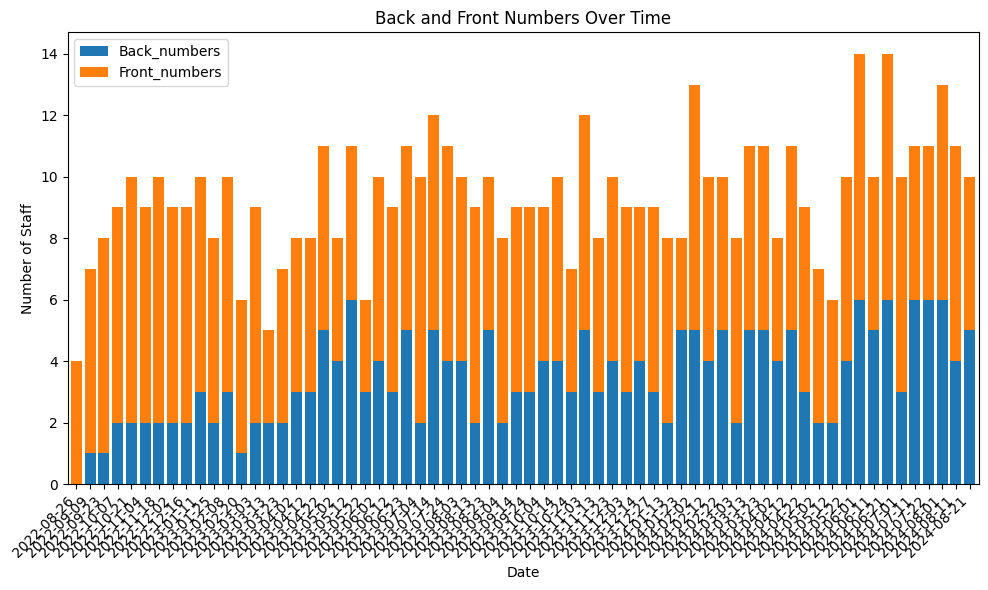

In [195]:
df_subset = manpower_sales_df.iloc[::10, :]  
print(df_subset.head())
# Plot with cleaner layout
df_subset.set_index('Date', inplace=True)

ax = df_subset[['Back_numbers', 'Front_numbers']].plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8)

# Rotate the x-axis labels for better readability
ax.set_xticklabels(df_subset.index.strftime('%Y-%m-%d'), rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Number of Staff')
plt.title('Back and Front Numbers Over Time')
plt.tight_layout()
plt.show()

In [196]:
manpower_sales_df.describe()

,Date,Day,Month,Year,No_of_Customers,precipitation_sum,Average_temp,Back_numbers,Front_numbers
count,660,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,2023-09-19 16:17:27.272727296,15.965152,6.475758,2023.221212,94.660606,2.143182,8.747308,3.619697,6.036364
min,2022-08-26 00:00:00,1.000000,1.000000,2022.000000,4.000000,0.000000,-19.368768,0.000000,3.000000
25%,2023-04-06 18:00:00,9.000000,4.000000,2023.000000,70.000000,0.000000,-1.108763,3.000000,5.000000
50%,2023-09-23 12:00:00,16.000000,6.000000,2023.000000,87.000000,0.000000,8.459480,4.000000,6.000000
75%,2024-03-17 06:00:00,23.000000,9.000000,2024.000000,116.000000,0.725000,18.899358,5.000000,7.000000
max,2024-08-30 00:00:00,31.000000,12.000000,2024.000000,223.000000,88.600000,31.562380,7.000000,10.000000
std,NaN,8.732250,3.288969,0.667593,36.078148,6.664699,11.576076,1.358134,1.413745


In [197]:
manpower_sales_df.to_csv("Transformed_Data/manpoer_sales.csv")

## Customer activity csv

In [198]:
summary_items_detailed_df = pd.read_csv("summary_items_detailed.csv", low_memory=False)


In [199]:
summary_items_detailed_df[summary_items_detailed_df['Customer_ID'] == '7ZPX7ER2C1DFMBRG0FC96X3WAM']

,Date,Time,Time_Zone,Category,Item,Qty,Price_Point_Name,SKU,Modifiers_Applied,Gross_Sales,...,Customer_Reference_ID,Unit,Count,Itemisation_Type,Commission,Employee,Fulfilment_Note,Token,Itemization_Type,Fulfillment_Note
28638,22-06-2024,23:02:18,America/Toronto,NaN,Custom Amount,1,NaN,NaN,NaN,$0.01,...,NaN,ea,1,NaN,$0.00,Zenna Aviden,NaN,NaN,NaN,NaN


In [200]:
summary_items_detailed_df = summary_items_detailed_df.dropna(subset=['Customer_ID'],  axis=0)

In [201]:
summary_items_detailed_df.dtypes

Date                      object
Time                      object
Time_Zone                 object
Category                  object
Item                      object
Qty                        int64
Price_Point_Name          object
SKU                      float64
Modifiers_Applied         object
Gross_Sales               object
Discounts                 object
Net_Sales                 object
Tax                       object
Transaction_ID            object
Payment_ID                object
Device_Name               object
Notes                     object
Details                   object
Event_Type                object
Location                  object
Dining_Option             object
Customer_ID               object
Customer_Name             object
Customer_Reference_ID     object
Unit                      object
Count                      int64
Itemisation_Type          object
Commission                object
Employee                  object
Fulfilment_Note          float64
Token     

In [202]:
print(summary_items_detailed_df.Net_Sales.dtype)

object


In [203]:
summary_items_detailed_df.loc[:, 'Net_Sales'] = summary_items_detailed_df['Net_Sales'].str.replace('$', '', regex=False)  # Remove dollar sign
summary_items_detailed_df.loc[:, 'Net_Sales'] = summary_items_detailed_df['Net_Sales'].str.replace(r'\((.*)\)', r'-\1', regex=True)  # Handle negative values
summary_items_detailed_df.loc[:, 'Net_Sales'] = summary_items_detailed_df['Net_Sales'].str.replace(',', '', regex=False)  # Remove commas
summary_items_detailed_df.loc[:, 'Net_Sales'] = summary_items_detailed_df['Net_Sales'].astype(float)  # Convert to float

In [204]:
summary_items_detailed_df_cleaned =  summary_items_detailed_df[~summary_items_detailed_df['Customer_ID'].str.contains(r',.* +$')]

In [205]:
summary_items_detailed_df_cleaned = summary_items_detailed_df_cleaned[["Date","Customer_ID", "Net_Sales" ]]

In [206]:
summary_items_detailed_df_cleaned.loc[:, 'Customer_ID'] = summary_items_detailed_df_cleaned['Customer_ID'].str.lstrip(', ')
summary_items_detailed_df_cleaned.loc[:, 'Customer_ID'] = summary_items_detailed_df_cleaned['Customer_ID'].str.split(',').str[0].str.strip()

In [207]:
summary_items_detailed_df_cleaned.loc[:, "Date"] = pd.to_datetime(summary_items_detailed_df_cleaned["Date"], format='%d-%m-%Y')

In [208]:
summary_items_detailed_df_cleaned

,Date,Customer_ID,Net_Sales
38,2024-08-31 00:00:00,1QKC9XZJJ1XYKH3TDC3W3ZMCV8,48.0
39,2024-08-31 00:00:00,1QKC9XZJJ1XYKH3TDC3W3ZMCV8,51.0
40,2024-08-31 00:00:00,1QKC9XZJJ1XYKH3TDC3W3ZMCV8,8.0
41,2024-08-31 00:00:00,1QKC9XZJJ1XYKH3TDC3W3ZMCV8,27.0
42,2024-08-31 00:00:00,1QKC9XZJJ1XYKH3TDC3W3ZMCV8,25.0
...,...,...,...
224259,2022-08-13 00:00:00,6NAAGN79C10ZF399K63HRVPCSR,9.0
224260,2022-08-13 00:00:00,6NAAGN79C10ZF399K63HRVPCSR,9.0
224261,2022-08-13 00:00:00,6NAAGN79C10ZF399K63HRVPCSR,8.0
224262,2022-08-13 00:00:00,6NAAGN79C10ZF399K63HRVPCSR,8.0


In [209]:
summary_items_group_by_df = summary_items_detailed_df_cleaned.groupby(by=["Customer_ID", "Date"]).sum().reset_index()

In [210]:
summary_items_group_by_df = summary_items_group_by_df.groupby('Customer_ID').agg(No_of_Visits=('Date', 'count'), Avg_Monetary_Value=('Net_Sales', 'mean'), 
                                                                                 Last_visit_date=('Date', 'max')).reset_index()

In [211]:
summary_items_group_by_df.dtypes

Customer_ID                   object
No_of_Visits                   int64
Avg_Monetary_Value            object
Last_visit_date       datetime64[ns]
dtype: object

In [212]:
summary_items_group_by_df

,Customer_ID,No_of_Visits,Avg_Monetary_Value,Last_visit_date
0,0017XWZ446JECNYPR2FSZ401VM,3,128.666667,2024-05-16
1,00EW3VHW4YCGN8C5ABBQ38Y2D8,1,102.0,2024-06-24
2,00MBVFF9C1NTTKPQGJXVR50BFW,1,67.0,2023-07-22
3,00W1SBWAA56Y7BH8EJSYPCBZVM,1,74.5,2022-11-19
4,0145EFYZ838DHVFZTTPFT1PCM4,1,159.0,2023-06-01
...,...,...,...,...
7578,ZZHDFMP5X4CR75VWBSEB3SQKNW,1,94.0,2023-11-05
7579,ZZJR09NVC5QYA3SCS45F2TAKTC,3,145.666667,2023-12-30
7580,ZZKKABRE2VD58JMFZ1NE14WXX0,1,75.0,2024-07-22
7581,ZZNBKRNCVY6D99FY1VMS05X88M,1,140.0,2023-07-15


In [213]:
summary_items_detailed_df_cleaned[summary_items_detailed_df_cleaned['Customer_ID'] == '7ZPX7ER2C1DFMBRG0FC96X3WAM']

,Date,Customer_ID,Net_Sales
28638,2024-06-22 00:00:00,7ZPX7ER2C1DFMBRG0FC96X3WAM,0.01


In [214]:
summary_items_group_by_df['Recency'] = pd.Timestamp('2024-08-31').normalize() - summary_items_group_by_df['Last_visit_date']

In [215]:
summary_items_group_by_df

,Customer_ID,No_of_Visits,Avg_Monetary_Value,Last_visit_date,Recency
0,0017XWZ446JECNYPR2FSZ401VM,3,128.666667,2024-05-16,107 days
1,00EW3VHW4YCGN8C5ABBQ38Y2D8,1,102.0,2024-06-24,68 days
2,00MBVFF9C1NTTKPQGJXVR50BFW,1,67.0,2023-07-22,406 days
3,00W1SBWAA56Y7BH8EJSYPCBZVM,1,74.5,2022-11-19,651 days
4,0145EFYZ838DHVFZTTPFT1PCM4,1,159.0,2023-06-01,457 days
...,...,...,...,...,...
7578,ZZHDFMP5X4CR75VWBSEB3SQKNW,1,94.0,2023-11-05,300 days
7579,ZZJR09NVC5QYA3SCS45F2TAKTC,3,145.666667,2023-12-30,245 days
7580,ZZKKABRE2VD58JMFZ1NE14WXX0,1,75.0,2024-07-22,40 days
7581,ZZNBKRNCVY6D99FY1VMS05X88M,1,140.0,2023-07-15,413 days


In [216]:
summary_items_group_by_df['Recency'] = summary_items_group_by_df['Recency'].dt.days 

In [217]:
summary_items_group_by_df

,Customer_ID,No_of_Visits,Avg_Monetary_Value,Last_visit_date,Recency
0,0017XWZ446JECNYPR2FSZ401VM,3,128.666667,2024-05-16,107
1,00EW3VHW4YCGN8C5ABBQ38Y2D8,1,102.0,2024-06-24,68
2,00MBVFF9C1NTTKPQGJXVR50BFW,1,67.0,2023-07-22,406
3,00W1SBWAA56Y7BH8EJSYPCBZVM,1,74.5,2022-11-19,651
4,0145EFYZ838DHVFZTTPFT1PCM4,1,159.0,2023-06-01,457
...,...,...,...,...,...
7578,ZZHDFMP5X4CR75VWBSEB3SQKNW,1,94.0,2023-11-05,300
7579,ZZJR09NVC5QYA3SCS45F2TAKTC,3,145.666667,2023-12-30,245
7580,ZZKKABRE2VD58JMFZ1NE14WXX0,1,75.0,2024-07-22,40
7581,ZZNBKRNCVY6D99FY1VMS05X88M,1,140.0,2023-07-15,413


In [218]:
summary_items_group_by_df['Avg_Monetary_Value'] = pd.to_numeric(summary_items_group_by_df['Avg_Monetary_Value'], errors='coerce')
summary_items_group_by_df['Avg_Monetary_Value'] = summary_items_group_by_df['Avg_Monetary_Value'].round(2)

In [219]:
summary_items_group_by_df

,Customer_ID,No_of_Visits,Avg_Monetary_Value,Last_visit_date,Recency
0,0017XWZ446JECNYPR2FSZ401VM,3,128.67,2024-05-16,107
1,00EW3VHW4YCGN8C5ABBQ38Y2D8,1,102.00,2024-06-24,68
2,00MBVFF9C1NTTKPQGJXVR50BFW,1,67.00,2023-07-22,406
3,00W1SBWAA56Y7BH8EJSYPCBZVM,1,74.50,2022-11-19,651
4,0145EFYZ838DHVFZTTPFT1PCM4,1,159.00,2023-06-01,457
...,...,...,...,...,...
7578,ZZHDFMP5X4CR75VWBSEB3SQKNW,1,94.00,2023-11-05,300
7579,ZZJR09NVC5QYA3SCS45F2TAKTC,3,145.67,2023-12-30,245
7580,ZZKKABRE2VD58JMFZ1NE14WXX0,1,75.00,2024-07-22,40
7581,ZZNBKRNCVY6D99FY1VMS05X88M,1,140.00,2023-07-15,413


In [220]:
scaler = StandardScaler()
summary_items_group_by_df['Recency_scaled'] = scaler.fit_transform(summary_items_group_by_df[['Recency']])
summary_items_group_by_df['No_of_Visits_scaled'] = scaler.fit_transform(summary_items_group_by_df[['No_of_Visits']])
summary_items_group_by_df['Avg_Monetary_Value_scaled'] = scaler.fit_transform(summary_items_group_by_df[['Avg_Monetary_Value']])

In [221]:
summary_items_group_by_df

,Customer_ID,No_of_Visits,Avg_Monetary_Value,Last_visit_date,Recency,Recency_scaled,No_of_Visits_scaled,Avg_Monetary_Value_scaled
0,0017XWZ446JECNYPR2FSZ401VM,3,128.67,2024-05-16,107,-1.177866,1.494591,-0.056026
1,00EW3VHW4YCGN8C5ABBQ38Y2D8,1,102.00,2024-06-24,68,-1.363930,-0.235316,-0.210893
2,00MBVFF9C1NTTKPQGJXVR50BFW,1,67.00,2023-07-22,406,0.248629,-0.235316,-0.414130
3,00W1SBWAA56Y7BH8EJSYPCBZVM,1,74.50,2022-11-19,651,1.417496,-0.235316,-0.370579
4,0145EFYZ838DHVFZTTPFT1PCM4,1,159.00,2023-06-01,457,0.491944,-0.235316,0.120093
...,...,...,...,...,...,...,...,...
7578,ZZHDFMP5X4CR75VWBSEB3SQKNW,1,94.00,2023-11-05,300,-0.257085,-0.235316,-0.257347
7579,ZZJR09NVC5QYA3SCS45F2TAKTC,3,145.67,2023-12-30,245,-0.519484,1.494591,0.042689
7580,ZZKKABRE2VD58JMFZ1NE14WXX0,1,75.00,2024-07-22,40,-1.497515,-0.235316,-0.367676
7581,ZZNBKRNCVY6D99FY1VMS05X88M,1,140.00,2023-07-15,413,0.282025,-0.235316,0.009764


In [222]:
# customer_activity_df = pd.merge(summary_items_group_by_df, customer_dim_df, on='Customer_ID)

In [223]:
summary_items_group_by_df.to_csv("Transformed_Data/customer_activity.csv",index=False)

## Item_Transaction csv

In [224]:
summary_items_detailed_df = pd.read_csv("summary_items_detailed.csv", low_memory=False)


In [225]:
summary_items_detailed_df.columns

Index(['Date', 'Time', 'Time_Zone', 'Category', 'Item', 'Qty',
       'Price_Point_Name', 'SKU', 'Modifiers_Applied', 'Gross_Sales',
       'Discounts', 'Net_Sales', 'Tax', 'Transaction_ID', 'Payment_ID',
       'Device_Name', 'Notes', 'Details', 'Event_Type', 'Location',
       'Dining_Option', 'Customer_ID', 'Customer_Name',
       'Customer_Reference_ID', 'Unit', 'Count', 'Itemisation_Type',
       'Commission', 'Employee', 'Fulfilment_Note', 'Token',
       'Itemization_Type', 'Fulfillment_Note'],
      dtype='object')

In [226]:
summary_items_detailed_df['Item'].nunique()

878

In [227]:
summary_items_detailed_df.Transaction_ID.isnull().sum()

0

In [228]:
summary_items_detailed_df.Transaction_ID.nunique()

44118

In [229]:
summary_items_detailed_df.Item.isnull().sum()

0

In [230]:
old_size=summary_items_detailed_df.shape
old_size[1]

33

In [231]:
pattern=r'\(Voided\)'
items_df=summary_items_detailed_df[~summary_items_detailed_df['Item'].str.contains(pattern,regex=True,na=False)]
new_size=items_df.shape
items_df

,Date,Time,Time_Zone,Category,Item,Qty,Price_Point_Name,SKU,Modifiers_Applied,Gross_Sales,...,Customer_Reference_ID,Unit,Count,Itemisation_Type,Commission,Employee,Fulfilment_Note,Token,Itemization_Type,Fulfillment_Note
0,01-09-2024,0:29:47,America/Toronto,Liquor,Johny's Martini,1,Regular,NaN,"Gin, Dirty",$17.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,VNT7DLBX4VY2AAEKYABYJJF6,Physical Good,NaN
1,01-09-2024,0:29:47,America/Toronto,Liquor,DBL Dark Rum,1,Regular,NaN,NaN,$20.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,AWD5URQUKM3JEI5HOEAUAUBI,Physical Good,NaN
2,01-09-2024,0:29:47,America/Toronto,Liquor,Aperol Spritz,1,Regular,NaN,NaN,$19.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,FFRI22FGNXK3Z2WXA6TMIYSB,Physical Good,NaN
3,01-09-2024,0:29:47,America/Toronto,Starters,Mozzarella Sticks,1,Regular,NaN,NaN,$16.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,6L3IWZLI5NHRR363CJNIZ3PG,Physical Good,NaN
4,01-09-2024,0:29:47,America/Toronto,Liquor,Johny's Martini,1,Regular,NaN,"Gin, Dirty",$17.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,VNT7DLBX4VY2AAEKYABYJJF6,Physical Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224261,13-08-2022,19:13:29,America/Toronto,Beer,Draft - Left-Field,1,Regular,NaN,NaN,$8.00,...,",",ea,1,Physical Good,$0.00,Daniel Suss,NaN,HD54K4MKL2WIVVECZQNBZP4U,NaN,NaN
224262,13-08-2022,19:13:29,America/Toronto,Beer,Draft - Left-Field,1,Regular,NaN,NaN,$8.00,...,",",ea,1,Physical Good,$0.00,Daniel Suss,NaN,HD54K4MKL2WIVVECZQNBZP4U,NaN,NaN
224264,13-08-2022,19:06:40,America/Toronto,Food,Burger,1,Regular,NaN,Medium Rare,$20.00,...,NaN,ea,1,Physical Good,$0.00,Daniel Suss,NaN,HJ4XW4EPMZHB6DM5F5OK4IKC,NaN,NaN
224265,13-08-2022,19:06:40,America/Toronto,Beer,Draft - Moretti,1,Regular,NaN,NaN,$9.00,...,NaN,ea,1,Physical Good,$0.00,Daniel Suss,NaN,3INOLYQQTRUY2VI63JMJXPKH,NaN,NaN


In [232]:
rows_del=old_size[0]-new_size[0]
print(f"{rows_del} rows were deleted")

4769 rows were deleted


In [233]:
dim_item_df=pd.read_csv("dim_itemset.csv")
dim_item_df

,Index,Category,item_name,Price
0,1,Starters,Warm olives,$9.00
1,2,Starters,Cheesy Garlic Bread,$11.00
2,3,Starters,Mozzarella Sticks,$16.00
3,4,Starters,Broccolini,$15.00
4,5,Starters,Shrimp Cocktail,$25.00
...,...,...,...,...
66,67,Modifier,ADD Anchovies,$2.50
67,68,Modifier,ADD Chimichurri,$2.50
68,69,Beverage,Sparkling water,$5.00
69,70,Beverage,Coke zero,$3.00


In [234]:
items_df["Category"].fillna(value="No Catgeory",inplace=True)
items_df["Category"].unique()

C:\Users\chack\AppData\Local\Temp\ipykernel_8264\1125286061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df["Category"].fillna(value="No Catgeory",inplace=True)


array(['Liquor', 'Starters', 'Beverage', "'Tavern Pie' - White",
       'Food (uncategorized)', 'Beer', 'Salads', "'Tavern Pie' - Red",
       'Orange Wine', 'No Catgeory', 'Wines by the Glass', 'Mains',
       'Dessert', 'Rosé', 'White Wine', 'Red Wine', 'Whiskey', 'Merch',
       'Tequila', 'Sparkling', 'Vodka', 'Food', 'Salads & Starters'],
      dtype=object)

In [235]:
categories_to_keep=[ 'Starters', 'Beverage', "'Tavern Pie' - White",
       'Food (uncategorized)', 'Beer', 'Salads', "'Tavern Pie' - Red",'No Catgeory','Mains','Dessert','Food', 'Salads & Starters']
items_df_filtered= items_df[items_df["Category"].isin(categories_to_keep)]
old_size=items_df.shape
new_size=items_df_filtered.shape
print(f"{old_size[0]-new_size[0]} rows deleted as a result of selecting required categories")

45421 rows deleted as a result of selecting required categories


In [236]:
pd.reset_option('all')
items_df_filtered[items_df["Item"].str.startswith("Cacio")]

C:\Users\chack\AppData\Local\Temp\ipykernel_8264\3666379378.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  items_df_filtered[items_df["Item"].str.startswith("Cacio")]


,Date,Time,Time_Zone,Category,Item,Qty,Price_Point_Name,SKU,Modifiers_Applied,Gross_Sales,...,Customer_Reference_ID,Unit,Count,Itemisation_Type,Commission,Employee,Fulfilment_Note,Token,Itemization_Type,Fulfillment_Note
11,01-09-2024,0:25:55,America/Toronto,'Tavern Pie' - White,Cacio Pepe,1,Regular,NaN,NaN,$25.00,...,NaN,ea,1,NaN,$0.00,N'Dayah Bain,NaN,KOYU3GBD3UQBMCKINA5WZJHV,Physical Good,NaN
42,31-08-2024,23:24:42,America/Toronto,'Tavern Pie' - White,Cacio Pepe,1,Regular,NaN,NaN,$25.00,...,NaN,ea,1,NaN,$0.00,Alexandra leishman,NaN,KOYU3GBD3UQBMCKINA5WZJHV,Physical Good,NaN
64,31-08-2024,23:16:13,America/Toronto,'Tavern Pie' - White,Cacio Pepe,1,Regular,NaN,NaN,$25.00,...,NaN,ea,1,NaN,$0.00,Alexandra leishman,NaN,KOYU3GBD3UQBMCKINA5WZJHV,Physical Good,NaN
85,31-08-2024,23:07:49,America/Toronto,'Tavern Pie' - White,Cacio Pepe,1,Regular,NaN,Mushrooms,$29.00,...,", ,",ea,1,NaN,$0.00,N'Dayah Bain,NaN,KOYU3GBD3UQBMCKINA5WZJHV,Physical Good,NaN
91,31-08-2024,22:59:24,America/Toronto,'Tavern Pie' - White,Cacio Pepe,1,Regular,NaN,NaN,$25.00,...,", ,",ea,1,NaN,$0.00,Gordon Harrison,NaN,KOYU3GBD3UQBMCKINA5WZJHV,Physical Good,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223583,20-08-2022,19:36:18,America/Toronto,Food,Cacio peppe,1,Regular,NaN,NaN,$24.00,...,NaN,ea,1,Physical Good,$0.00,Daniel Suss,NaN,KOYU3GBD3UQBMCKINA5WZJHV,NaN,NaN
223654,20-08-2022,17:35:46,America/Toronto,Food,Cacio peppe,1,Regular,NaN,NaN,$24.00,...,NaN,ea,1,Physical Good,$0.00,Daniel Suss,NaN,KOYU3GBD3UQBMCKINA5WZJHV,NaN,NaN
223732,19-08-2022,22:52:36,America/Toronto,Food,Cacio peppe,1,Regular,NaN,NaN,$24.00,...,NaN,ea,1,Physical Good,$0.00,Daniel Suss,NaN,KOYU3GBD3UQBMCKINA5WZJHV,NaN,NaN
223769,19-08-2022,21:06:00,America/Toronto,Food,Cacio peppe,1,Regular,NaN,NaN,$24.00,...,", , ,",ea,1,Physical Good,$0.00,Daniel Suss,NaN,KOYU3GBD3UQBMCKINA5WZJHV,NaN,NaN


In [237]:
reference_item=dim_item_df['item_name'].to_list()
items_df_filtered['Matched_Name']=items_df_filtered['Item'].apply(lambda x:process.extractOne(x,reference_item)[0] if process.extractOne(x,reference_item)[1] > 85 else 'Unknown')
items_df_filtered

C:\Users\chack\AppData\Local\Temp\ipykernel_8264\1471561367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df_filtered['Matched_Name']=items_df_filtered['Item'].apply(lambda x:process.extractOne(x,reference_item)[0] if process.extractOne(x,reference_item)[1] > 85 else 'Unknown')


,Date,Time,Time_Zone,Category,Item,Qty,Price_Point_Name,SKU,Modifiers_Applied,Gross_Sales,...,Unit,Count,Itemisation_Type,Commission,Employee,Fulfilment_Note,Token,Itemization_Type,Fulfillment_Note,Matched_Name
3,01-09-2024,0:29:47,America/Toronto,Starters,Mozzarella Sticks,1,Regular,NaN,NaN,$16.00,...,ea,1,NaN,$0.00,N'Dayah Bain,NaN,6L3IWZLI5NHRR363CJNIZ3PG,Physical Good,NaN,Mozzarella Sticks
5,01-09-2024,0:29:47,America/Toronto,Starters,Fries,1,Regular,NaN,NaN,$8.00,...,ea,1,NaN,$0.00,N'Dayah Bain,NaN,2BRHIVVU7SHZCFCLZR5V5QXW,Physical Good,NaN,fries
6,01-09-2024,0:29:47,America/Toronto,Beverage,Diet coke,1,Regular,NaN,NaN,$3.50,...,ea,1,NaN,$0.00,N'Dayah Bain,NaN,N2C7A5SXOH4ZIX3RXKN7MP2B,Physical Good,NaN,Diet coke
10,01-09-2024,0:25:55,America/Toronto,Starters,Cheesy Garlic Bread,1,Regular,NaN,NaN,$11.00,...,ea,1,NaN,$0.00,N'Dayah Bain,NaN,PT6LT4MCE23IFQJTNNPIGOWG,Physical Good,NaN,Cheesy Garlic Bread
11,01-09-2024,0:25:55,America/Toronto,'Tavern Pie' - White,Cacio Pepe,1,Regular,NaN,NaN,$25.00,...,ea,1,NaN,$0.00,N'Dayah Bain,NaN,KOYU3GBD3UQBMCKINA5WZJHV,Physical Good,NaN,Cacio Pepe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224261,13-08-2022,19:13:29,America/Toronto,Beer,Draft - Left-Field,1,Regular,NaN,NaN,$8.00,...,ea,1,Physical Good,$0.00,Daniel Suss,NaN,HD54K4MKL2WIVVECZQNBZP4U,NaN,NaN,Draft - Left-Field
224262,13-08-2022,19:13:29,America/Toronto,Beer,Draft - Left-Field,1,Regular,NaN,NaN,$8.00,...,ea,1,Physical Good,$0.00,Daniel Suss,NaN,HD54K4MKL2WIVVECZQNBZP4U,NaN,NaN,Draft - Left-Field
224264,13-08-2022,19:06:40,America/Toronto,Food,Burger,1,Regular,NaN,Medium Rare,$20.00,...,ea,1,Physical Good,$0.00,Daniel Suss,NaN,HJ4XW4EPMZHB6DM5F5OK4IKC,NaN,NaN,Tavern Burger
224265,13-08-2022,19:06:40,America/Toronto,Beer,Draft - Moretti,1,Regular,NaN,NaN,$9.00,...,ea,1,Physical Good,$0.00,Daniel Suss,NaN,3INOLYQQTRUY2VI63JMJXPKH,NaN,NaN,Draft - Moretti


In [238]:
items_df_filtered.to_csv('Transformed_Data/Item_Corrected_name.csv')

In [239]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Ensure it fits within the window
pd.set_option('display.max_colwidth', None) 
items=items_df_filtered[items_df_filtered['Matched_Name']=='Unknown']
result=items.groupby('Item')['Item'].count().reset_index(name='Count')
result.sort_values(by='Count',ascending=False)

,Item,Count
77,SEND AS READY,1014
22,Custom Amount,610
56,Moretti Happy Hour,400
44,Johnys Rotating Tap,371
58,Mozza Sticks [Happy Hour],249
30,Dessert Feature,218
63,PARTY cocktail,190
93,Shirley Temple,183
65,PIZZA FEATURE,162
43,Jameson,151


In [240]:
req_items_df=items_df_filtered[items_df_filtered["Matched_Name"]!="Unknown"]
req_items_df['Matched_Name'].unique()
old_size=items_df_filtered.shape
new_size=req_items_df.shape
print(f"{old_size[0]-new_size[0]} rows were deleted because the name of item cannot be grouped")

5905 rows were deleted because the name of item cannot be grouped


In [244]:

item_transactions = pd.get_dummies(req_items_df.set_index('Transaction_ID')['Matched_Name']).groupby(level=0).sum().clip(upper=1).reset_index()


In [245]:
pd.reset_option('all')
item_transactions

,Transaction_ID,ADD Anchovies,ADD Arugula,ADD Banana peppers,ADD Cheese,ADD Chimichurri,ADD Mushrooms,ADD Pepperoni,ADD Pickled onions,ADD Pineapple,...,Sparkling water,Sprite,THE SEASON,Tavern Burger,Tomato Pie,Veggie Burger,Warm olives,Weinhen,fries,ruby
0,101FDxUxHM14dQ7GlLOEsaAfV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,101JbcYBSGsHVCKhZWmpubAfV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,103mNC0A4AiTXDaMJpB8QNxeV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,105H7tUFv6bUU2V7cAvkX76eV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,109NhbeR8QqADmHlNRDB0QyeV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41898,zzry6sv9va2RGkxOT5O8cw1eV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41899,zzt5nNB1jdcNsjEKYFh2vPueV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41900,zzvGBdG8t0xNQspbo4K7W9weV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41901,zzzUVSrvBCQvkG8fllOR9j9eV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
item_transactions.columns

Index(['Transaction_ID', 'ADD Anchovies', 'ADD Arugula', 'ADD Banana peppers',
       'ADD Cheese', 'ADD Chimichurri', 'ADD Mushrooms', 'ADD Pepperoni',
       'ADD Pickled onions', 'ADD Pineapple', 'Ace Hill - Lemon',
       'Ace Hill - Mango', 'Ace Hill - Pineapple', 'Ace Hill - Raspberry',
       'Ace Hill - Tropical Punch', 'Arugula Salad', 'BTL - Miller',
       'BTL - Modelo', 'Basil Sipper', 'Beamer', 'Blanche de Chamblay',
       'Boylens Soda', 'Broccolini', 'Cacio Pepe', 'Caesar Salad',
       'Can - Cider', 'Can - Ice Cold', 'Can Collective Arts Cider', 'Cheese',
       'Cheesy Garlic Bread', 'Chopped Salad', 'Clam Pie', 'Coke zero',
       'Dad's Root Beer', 'Diet coke', 'Draft - Blood Brothers',
       'Draft - Jelly King', 'Draft - Left-Field', 'Draft - Moretti',
       'Draft - WoodHouse', 'FULL - Vinegar Chicken',
       'Frozen Key Lime Pie on a Stick', 'Garlic Sauce', 'Ginger Ale',
       'Green Pie', 'HALF - Vinegar Chicken', 'Hawaiian', 'Hellas Burdock',
       'Hot

In [247]:
item_transactions.to_csv('Transformed_Data/Item_Transactions_apriori.csv')

## 

<h1>Section analysis

In [ ]:
df = pd.read_csv("summary_section.csv")

In [ ]:
df

,Section_Name,Table_Name,Covers,Gross_Sales,Tips,Avg._Sale_per_Cover,Refunds,date,Unnamed: 8,Unnamed: 9
0,Bar,82,2,$77.00,$24.07,$38.50,$0.00,13-08-2022,NaN,NaN
1,Bar,83,3,$86.00,$18.87,$28.66,$0.00,13-08-2022,NaN,NaN
2,Bar,84,1,$29.00,$4.10,$29.00,$0.00,13-08-2022,NaN,NaN
3,Bar,85,1,$9.00,$3.00,$9.00,$0.00,13-08-2022,NaN,NaN
4,Dining Room,10,9,$423.00,$92.77,$45.00,$0.00,13-08-2022,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16985,Patio,NaN,12,$259.50,$40.23,$21.62,$0.00,31-08-2024,47,NaN
16986,Patio,NaN,6,$315.50,$69.48,$52.58,$0.00,31-08-2024,50,NaN
16987,Patio,NaN,8,$396.00,$93.47,$49.50,$0.00,31-08-2024,51,NaN
16988,Patio,NaN,4,$112.00,$22.78,$28.00,$0.00,31-08-2024,52,NaN
